### Importing Necessary Libraries and Setting Up the Environment

In [522]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvssu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvssu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pvssu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- In this code, I have imported necessary libraries for data manipulation (pandas, numpy), data visualization (seaborn, matplotlib), and natural language processing (nltk). Additionally, I have downloaded essential NLTK datasets, set up the plotting style using ggplot, and imported specific components from NLTK and scikit-learn for text processing and building machine learning models.

### Loading Data

In [523]:
data = pd.read_excel("C:/Users/pvssu/Desktop/EITACIES/CreditCard detection/credit.xlsx")

- In this code, I have loaded the dataset from an Excel file located at the specified path using pandas. The data is stored in a DataFrame called data, which will be used for further analysis and processing.

## Data Preprocessing & Exploratory Data Analysis

### Displaying the First Few Rows of Data

In [524]:
data.head

<bound method NDFrame.head of      label                                            message
0        1  Security alert: Unusual activity detected on c...
1        0       Seem people small. Firm consumer series top.
2        0              Seat determine doctor court yard get.
3        0        Between significant always or theory build.
4        0                      Smile agreement weight those.
..     ...                                                ...
294      1  Security alert: Unusual activity detected on c...
295      0                  Follow style have my environment.
296      0           Crime respond keep born somebody threat.
297      1  Security alert: Unusual activity detected on c...
298      0                      Usually move similar do body.

[299 rows x 2 columns]>

### Preprocessing Text Data

In [525]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word in filtered_tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(word))
    
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

data['message'] = data['message'].apply(preprocess_text)

- In this code, I define a function to preprocess text data by converting it to lowercase, removing non-alphanumeric characters, tokenizing the text, filtering out stop words, and lemmatizing the tokens. Then, I apply this function to the 'message' column in the dataset.

### Checking the Shape of the Data

In [526]:
data.shape

(299, 2)

### Check for missing values

In [527]:

print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
label      0
message    0
dtype: int64


### Distribution of labels

In [528]:

print("\nDistribution of labels:")
print(data['label'].value_counts())



Distribution of labels:
0    154
1    145
Name: label, dtype: int64


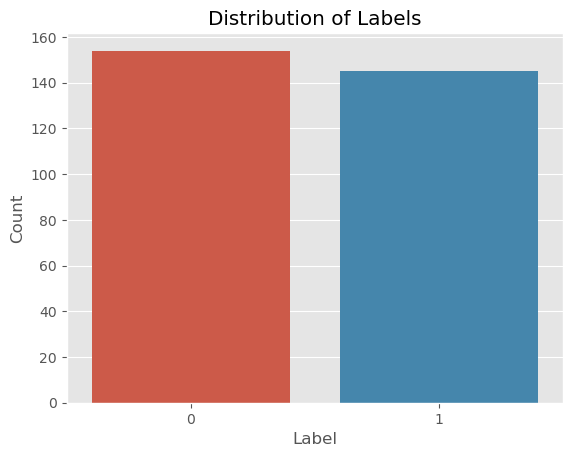

In [529]:
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### Basic statistics of text length

In [530]:

data['message_length'] = data['message'].apply(len)
print("\nStatistics of message length:")
print(data['message_length'].describe())


Statistics of message length:
count    299.000000
mean      49.725753
std       16.003304
min       16.000000
25%       36.000000
50%       53.000000
75%       65.000000
max       75.000000
Name: message_length, dtype: float64


### Plot message length distribution

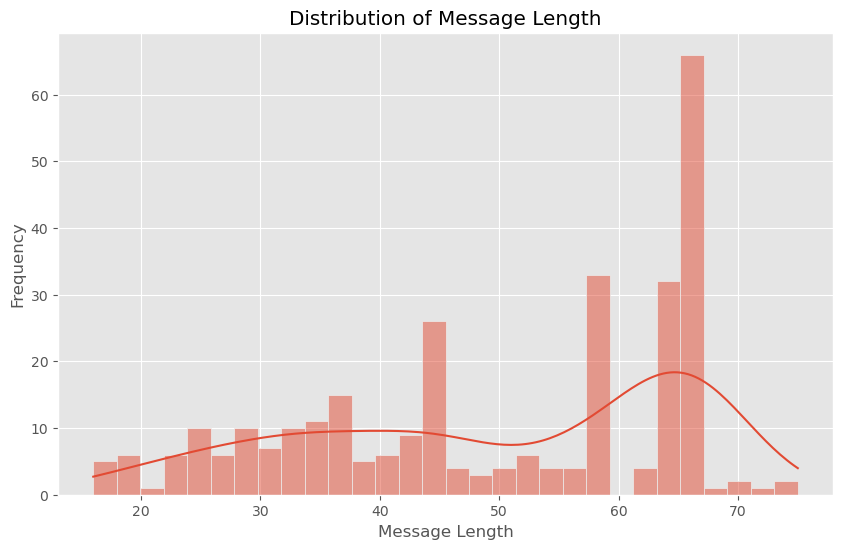

In [531]:

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=30, kde=True)
plt.title('Distribution of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

### Selecting rows where the label is 0 (no credit card details)

In [532]:

no_credit_info = data[data['label'] == 0]
no_credit_info.head()

,label,message,message_length
1,0,seem people small firm consumer series top,42
2,0,seat determine doctor court yard get,36
3,0,significant always theory build,31
4,0,smile agreement weight,22
6,0,picture expert several expect court blood look...,50


### Selecting rows where the label is 1 (Rows having credit card details)

In [533]:
credit_info_present = data[data.label == 1]
credit_info_present.head()

,label,message,message_length
0,1,security alert unusual activity detected card ...,65
5,1,security alert unusual activity detected card ...,65
8,1,card 1570 4489 8851 8705 expiring 0828 require...,67
12,1,reminder card 8925 8544 6752 1202 expire 0429,45
14,1,card 5188 2166 8270 8545 please update expirat...,59


### TF-IDF Vectorization

In [534]:
tfidf_vectorized_data = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorized_data.fit(data['message'])
vect = tfidf_vectorized_data

- I instantiate a TF-IDF vectorizer tfidf_vectorized_data with an n-gram range of (1, 3), which means it considers unigrams, bigrams, and trigrams. Then, I fit this vectorizer to the preprocessed text data stored in data['message']

In [535]:
vect

TfidfVectorizer(ngram_range=(1, 3))

### Retrieving Feature Names from TF-IDF Vectorizer

In [536]:
feature_names = vect.get_feature_names_out()

In [537]:
feature_names

array(['0124', '0125', '0125 requires', ..., 'young', 'young open',
       'young open third'], dtype=object)

### Transforming Text Data and Splitting into Train-Test Sets

In [538]:
x = data['message']
y = data['label']
x = vect.transform(x)

In [539]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=72)

## Fitting Logistic Regression Model

In [540]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)

In [541]:
class_report = classification_report(y_test, logreg_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       1.00      0.82      0.90        39

    accuracy                           0.88        60
   macro avg       0.88      0.91      0.88        60
weighted avg       0.91      0.88      0.89        60



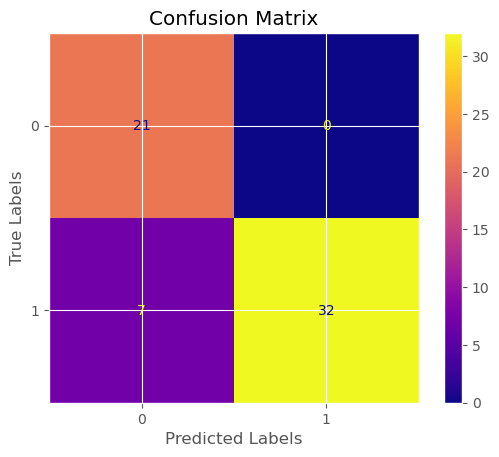

In [542]:
conf_matrix = confusion_matrix(y_test, logreg_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=logreg.classes_)
disp.plot(cmap='plasma') 
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Fitting Multinomial Naive Bayes

- Multinomial Naive Bayes is chosen because they are well-suited for text classification tasks like spam detection or credit card detection

In [543]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_predict = nb.predict(x_test)

In [544]:

class_report = classification_report(y_test, nb_predict)
print(class_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.99        39

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



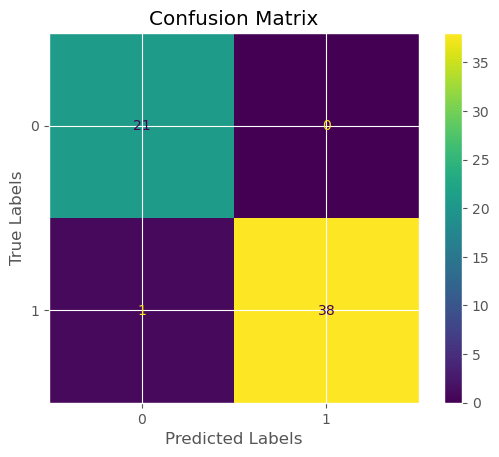

In [545]:
conf_matrix = confusion_matrix(y_test, nb_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=nb.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Hyperparameter tuning using GridSearchCV

In [546]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

In [547]:
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)
grid_nb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]})

In [548]:
print("Best Cross-validation score: {:.2f}".format(grid_nb.best_score_))
print("Best parameters: ", grid_nb.best_params_)

Best Cross-validation score: 1.00
Best parameters:  {'alpha': 0.1}


In [549]:
y_pred_nb = grid_nb.predict(x_test)

In [550]:
nb_acc = accuracy_score(y_pred_nb, y_test)
print("Test accuracy: {:.2f}%".format(nb_acc * 100))

Test accuracy: 100.00%


In [551]:
print(confusion_matrix(y_test, y_pred_nb))
print("\n")
print(classification_report(y_test, y_pred_nb))

[[21  0]
 [ 0 39]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        39

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



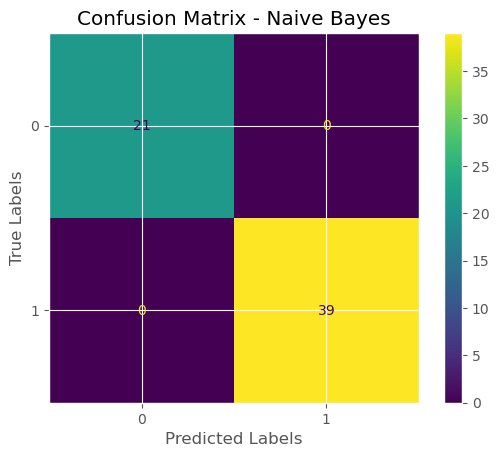

In [552]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=grid_nb.classes_)
disp_nb.plot(cmap='viridis') 
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Text Preprocessing Function

In [553]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  
    filtered_tokens = [token for token in tokens if token.isalnum() and token not in stop_words] 
    return ' '.join(filtered_tokens)

### Credit Card Detection and JSON Output

In [554]:

import os.path

def predict_credit_card(input_text):
    processed_text = preprocess_text(input_text)  
    X_input = vect.transform([processed_text])  
    prediction = grid_nb.predict(X_input)  
    prediction_text = 'Credit Card Detected' if prediction == 1 else 'No Credit Card Detected'
    result = {
        "Text": input_text,
        "Prediction": prediction_text
    }
    return result

user_input = input("Enter the text: ")
prediction_result = predict_credit_card(user_input)

json_file = "C:/Users/pvssu/Desktop/EITACIES/CreditCard detection/credit_output.json"
if os.path.isfile(json_file):
    df = pd.read_json(json_file, orient="records")
else:
    df = pd.DataFrame()

df = df.append(prediction_result, ignore_index=True)
df.to_json(json_file, orient="records")

print("Prediction result has been saved to credit_output.json")

Prediction result has been saved to credit_output.json


In [555]:
pip install pymongo


Note: you may need to restart the kernel to use updated packages.


### Loading JSON Data into MongoDB

In [556]:

import json
from pymongo import MongoClient

def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            collection.insert_many(data)
        else:
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")





### Usage

In [557]:
json_file_path = "C:/Users/pvssu/Desktop/EITACIES/CreditCard detection/credit_output.json"
db_name = 'testdb'
collection_name = 'testcollection'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Data from C:/Users/pvssu/Desktop/EITACIES/CreditCard detection/credit_output.json has been successfully imported into the testdb.testcollection collection.
